# PROJET PYBD

[Kaggle](https://www.kaggle.com/kumarajarshi/life-expectancy-who)

In [8]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px 

#pd.options.plotting.backend = "plotly"
plotly.offline.init_notebook_mode(connected=True)

In [67]:
alcohol_consumption = pd.read_csv('data/gho_alcohol_consumer_past_12months.csv')
alcohol_consumption.dropna(how='all', axis=1, inplace=True)
alcohol_consumption = alcohol_consumption.rename(columns = {"SpatialDimValueCode": "Code"})
alcohol_consumption = alcohol_consumption.rename(columns = {"Location": "Country"})
alcohol_consumption = alcohol_consumption.rename(columns = {"Value": "% of alcohol drinkers"})
alcohol_consumption = alcohol_consumption.rename(columns = {"Dim1ValueCode": "Sex"})
alcohol_consumption = alcohol_consumption.rename(columns = {"ParentLocationCode": "Zone"})
pib = pd.read_csv('data/gdp-per-capita-worldbank.csv')
pib = pib.rename(columns = {"GDP per capita, PPP (constant 2017 international $)": "GDP"})
del pib['Entity']
pib = pib.sort_values(by = ['Year'])
pib = pib.drop_duplicates(subset=['Code'], keep='last')

In [68]:
alcohol_consumption = alcohol_consumption.loc[alcohol_consumption["% of alcohol drinkers"] != '.']
alcohol_consumption = alcohol_consumption.astype({"% of alcohol drinkers" : "float64"})

In [69]:
alcohol_consumption.dtypes

Zone                      object
Code                      object
Country                   object
Sex                       object
% of alcohol drinkers    float64
dtype: object

In [71]:
df_consumption_pib = pd.merge(alcohol_consumption, pib, on = 'Code')
df_consumption_pib.head()

,Zone,Code,Country,Sex,% of alcohol drinkers,Year,GDP
0,EMR,LBY,Libya,BTSX,0.1,2020,10282.291080
1,EMR,LBY,Libya,FMLE,0.1,2020,10282.291080
2,EMR,LBY,Libya,MLE,0.2,2020,10282.291080
3,EMR,KWT,Kuwait,FMLE,0.2,2019,49853.736281
4,EMR,KWT,Kuwait,BTSX,0.6,2019,49853.736281


In [70]:
px.scatter(df_consumption_pib[df_consumption_pib == 'BTSX'], x='GDP', y= '% of alcohol drinkers',  hover_name="Country")

In [72]:
px.scatter(df_consumption_pib[df_consumption_pib.Sex == 'BTSX'], x='GDP', y= '% of alcohol drinkers', hover_name="Country")

In [76]:
px.scatter(df_consumption_pib[df_consumption_pib.Sex == 'BTSX'], x='GDP', y= '% of alcohol drinkers', color = 'Zone', hover_name="Country", log_x=True)

Zone                      object
Code                      object
Country                   object
Sex                       object
% of alcohol drinkers     object
Year                       int64
GDP                      float64
dtype: object

### Data Visualisation with World Map

In [11]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 3.9 MB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=6253 sha256=5499079757d64d5316ce94e6895092879f4f9ebae16de820fea9c8438e23452a
  Stored in directory: /home/luca/.cache/pip/wheels/ac/cb/8a/b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built retrying


In [12]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [13]:
init_notebook_mode(connected=True) 

In [14]:
df_crimes = pd.read_csv('data/gho_alcohol_related_crimes.csv')
df_crimes.dropna(how='all', axis=1, inplace=True)
df_crimes = df_crimes[df_crimes['FactValueNumeric'].notna()]


In [15]:
data = dict(
        type = 'choropleth',
        locations = df_crimes['Location'],
    locationmode = 'country names',
        z = df_crimes['Value'],
        text = df_crimes['Location'],
        colorbar = {'title' : 'alcohol related crimes per country'},
      ) 

In [16]:
layout = dict(
    title = 'alcohol related crimes per country',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)

In [17]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

### Heatmap

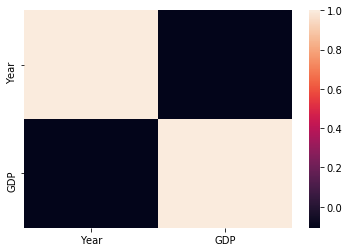

In [90]:
corr = df_consumption_pib.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)